# SNLP 2021 Final Project

Name 1: <br/>
Student id 1: <br/>
Email 1: <br/>


Name 2: <br/>
Student id 2: <br/>
Email 2: <br/> 

**Instructions:** Your final submission should contain _a separate Notebook_ (not including our instructions). You may also implement your code in different Python files and show the output in the Notebooks. In this case, make sure you submit your Python files as well. Do not submit the data files and any other debug output. Your submission should have a clear structure and should be easy to follow. Other instructions to follow have been given in detail with the project problem statement. Read them carefully.

Upload the zipped folder in Teams. Only one member from the group should make the submission. The deadline for the project submission is August 20th, 2021 (23:59 pm). 

# 1) Introduction

As you have learned so far, OOV words are a critical issue in language models, especially for morphologically rich languages. They lead to 0 MLE estimates, and also reduce the performance of the model as the OOV rate increases. In this project, we will try to address the problem of OOV words by one of the solutions proposed in Assignment 5: *using subword representations*. Your task is to perform the following steps:

1. Find appropriate subwords for a given corpus. 
2. Train a neural network model over these subwords.
3. Use the trained model to generate a newer, larger "corpus". 
4. Compare the OOV rates obtained on varying sizes of the generated corpora with a baseline OOV rate over word tokens.
5. Perform hyperparameter tuning at subword and neural network level to get the optimal OOV rates over the generated corpora. 

**You will repeat the above steps for two language corpora: English, and Bengali.** 

Each of the steps in the above outline have been described in detail in the rest of the Notebook. You will also find instructions on different libraries you will utilise for implementing the project. 

# 2) Setup

## Virtual Machine
**This is for Windows users who don't have a Linux machine or VM.**

A large part of this project involves running models that require C++ binaries and wheels that are easily installable on a Linux OS. That is why, we are providing a virtual machine with the required libraries pre-installed in a project environment.

1. Download and install [VMWare Workstation Player](https://www.vmware.com/products/workstation-player/workstation-player-evaluation.html).
After downloading, On Windows, just run the `.exe` file. On Linux you have to execute the `.bundle` file with root privileges:
```shell
cd path/to/bundle
chmod a+x 
sudo ./VMware-Player*.bundle --required
```

2. Download the [appliance](https://teams.microsoft.com/_#/school/files/Lecture?threadId=19%3A55c021361fe84c79811077ddbb6ef883%40thread.tacv2&ctx=channel&context=vm&rootfolder=%252Fsites%252F127759SNLP%252FFreigegebene%2520Dokumente%252FLecture%252Fvm) (you can also go to `Teams > SNLP > Lecture > files > vm`).

3. Open Virtualbox, select `File -> Import Appliance` and then point to the .ova file on your system. You can use the default settings by Virtualbox, but it's a good idea to increase the memory and core count. <br/>
The login password is 'snlp-21'. 

4. All the required libraries and their dependencies have been installed to the `project` conda virtual environment. Press `ctrl+alt+t` to open a console. To edit the Python files, you may install [Visual Studio Code](https://code.visualstudio.com/docs/setup/linux), or any other editor of your choice.

The details of how to use these libraries are mentioned in the respective task. Those who wish to install the libraries on their local machine are free to do so. In that case, check the links given for these requirements and install them appropriately.

---

**Follow the steps below ONLY if you don't use the VM provided by us!**

### a: Sentencepiece

You will use this library to assist you with implementing subwords. 

Install [sentencepiece](https://github.com/google/sentencepiece) either via pip or compile it from source.

### b: RNNLM

The RNNLM toolkit is used to quickly train, evaluate, and use statistical language models. It implements [RNN](https://medium.com/swlh/simple-explanation-of-recurrent-neural-network-rnn-1285749cc363)s in C++. It is possible to train RNN models without a GPU using this toolkit. 

1. Download rnnlm from [here](http://www.fit.vutbr.cz/~imikolov/rnnlm/) and extract the archive.

2. If not already installed, install the latest C++ compiler:

  ```shell
sudo apt update && apt upgrade -y
sudo apt install build-essential 
```

  Replace the old version of the cpp compiler in the make file with the current version from your machine:
  ```shell
ls /usr/bin/ | grep x86_64-linux-gnu-cpp
```
This command should show something like this:
```
x86_64-linux-gnu-c++
x86_64-linux-gnu-c++-10
x86_64-linux-gnu-c++-9
```
Now, put `/usr/bin/x86_64-linux-gnu-c++-10` (rather the actual output on your machine) into the first line of the makefile:
```
CC = /usr/bin/x86_64-linux-gnu-g++-10
```

3. Compile by typing
```
make -j 2
```
You can replace `2` with a larger number if your system has more cores/threads available, but this shouldn't take too long.



# 3) Overview

Below, we describe each of the project tasks in detail. You can either show parallel implementations of all the steps for English and Bengali, or show all the tasks for English first, and repeat the process for Bengali (we recommend the second approach). 

## **1 Data Preparation (12 points)**

We will use an English corpus that you already know from the assignments (*Alice in Wonderland*), and a Bengali corpus that is decidedly different in both context and language structure. You can find the corpora in `data/bengali_corpus.txt` and `data/alice_in_wonderland.txt`.

1. Preprocess both corpora such that they can serve as the input to sentencepiece. (8 points)

2. Split the preprocessed corpus into a train and a test set. The test set should comprise 20% of the corpus. Write the two sets to files `train.txt` and `test.txt` (4 points)

In [5]:
# Import
import nltk
import string 
import os
import math


cwd = os.getcwd()
print("Current working directory: {0}".format(cwd)) 

Current working directory: /home/snlp-project-21/SNLP_2021_Final_Project_r1


In [2]:
#os.chdir("..")

In [3]:
file_english = open("data/alice_in_wonderland.txt", "r")

english_read_data=file_english.read()

english_read_data = english_read_data.lower()

#punctuations = '''!()-[]{};:'"\`,<>/?@#$%^&*_~'''


string_without_punctuations = ""

import re


string_without_punctuations=re.sub('[^A-Za-z0-9 .]+', ' ', english_read_data)
string_without_punctuations=re.sub(' +', ' ', string_without_punctuations)
#print(len(string_without_punctuations))




from nltk.tokenize import sent_tokenize
abcd=sent_tokenize(string_without_punctuations)




total_length=len(abcd)
train_size=math.floor(0.8*total_length)
test_size=math.ceil(0.2*total_length)




train_file=abcd[0:train_size]
test_file=abcd[train_size:total_length]


#based on total char in aice in wonderland


with open('train_file_english.txt', 'w') as f:
    for item in train_file:
        f.write("%s\n" % item)
        
with open('test_file_english.txt', 'w') as f:
    for item in test_file:
        f.write("%s\n" % item)







## **2 Subword Segmentation (16 points)**

### 2.1 Introduction

In this section you should break down the data into smaller units. Subwords are a very powerful tools used all around NLP which bridge the generative gap between characters and whole words.

Subwords are a means for tools to address the structure of the word. Instead of having just two views of the word as a string of characters and as an atomic word unit, we get a new one in between which is similar to syllables, but based on statistical properties of the text and with a degree of adjustability:

- Characters: `b e d c l o t h e s`
- Word unit: `bedclothes`
- Subword: `▁bed clo th es`

In the given example, the word `bedclothes` was split into four subword units, which as a standalone occur much more frequently than the word itself. To determine which co-ocurring characters should form a subword, we need to use a specific algorithm. Since this algorithm adds spaces in between subwords, we need to mark the beginning of a word somehow to not lose the information about the real spaces between words (segmentation needs to be reversible). In the case of [Byte-Pair-Encoding](www.aclweb.org/anthology/P16-1162) (the algorithm we are using), this is marked by the `▁` symbol (note that this is not the same as an underscore `_`).

For more information either check [our tutorial](https://github.com/zouharvi/uds-snlp-tutorial/blob/main/smoothing-1/handout.pdf) (Slide 4) or this [hands-on tutorial on BPE](https://leimao.github.io/blog/Byte-Pair-Encoding/).

### 2.2 Usage

In this project, you are going to be using the [SentencePiece](https://github.com/google/sentencepiece) implementation of BPE.

Even though installing this library is just a single `pip3 install sentencepiece` call, the VM already comes with this dependency pre-installed. It offers both shell and Python interface.

The first step is to train the model and specify the target vocabulary size. This can be done with the following call:

```
spm_train \
  --input=path_to_train.txt \
  --model_prefix=model_prefix \
  --vocab_size=1000 \
  --character_coverage=1.0 \
  --model_type=bpe
```

This will create a vocabulary of subwords of size **1000** based on **path_to_train.txt** and store the results in **model_prefix.vocab** and **model_prefix.model**. You are asked to change the first three parameters based on the requirements of this project. <br/>
(Note: The character coverage for non-English languages is usually around ~0.995)

The next step is to segment the original text using this model. This can be done using the following call:

```
spm_encode \
  --model=model_prefix.model \
  --output_format=piece \
  < path_to_train.txt \
  > segmented.txt
```

This will segment the file **path_to_train.txt** with the model **model_prefix.model** and store the results in **segmented.txt**.

After this step, depending on the configuration, the contents of the output file should look something like this:

```
...
▁Alice ▁was ▁beginning ▁to ▁get ▁very ▁ti red ▁of ▁sit ting ▁by ▁her ▁s is ter
▁on ▁the ▁b an k , ▁and ▁of ▁ha ving ▁nothing ▁to ▁do : ▁once ▁or ▁tw ice ▁she ▁had
...
```

It is also desirable to be able to go back from subword unit segmentation back to the original text (e.g. after generating text in subword units). This can be done trivially using a Python one-liner, though the safer option is to use an existing tool:

```
spm_decode \
  --model=model_prefix.model \
  --input_format=piece \
  < segmented.txt \
  > original.txt
```

This will turn the segmented input text in **segmented.txt** and retrieves the human-readable text to **original.txt** using the model **model_prefix.model**.

You can run shell commands from within Jupyter Notebook directly on your local system (given that you are connected to a local Python environment). And example is shown below.

In [6]:
!spm_train \
  --input=train_file_english.txt \
  --model_prefix=model_prefix \
  --vocab_size=1000 \
  --character_coverage=1.0 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: train_file_english.txt
  input_format: 
  model_prefix: model_prefix
  model_type: BPE
  vocab_size: 1000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  esc

In [5]:
!spm_encode \
  --model=model_prefix.model \
  --output_format=piece \
  < train_file_english.txt \
  > segmented.txt

In [6]:
!spm_decode \
  --model=model_prefix.model \
  --input_format=piece \
  < segmented.txt \
  > original.txt

In [7]:
!pwd
!ls 

/home/snlp-project-21/SNLP_2021_Final_Project_r1
bengali.ipynb				segmented_english_subword_lg_train.txt
data					segmented_english_subword_sm_train.txt
model_prefix.model			segmented.txt
model_prefix.vocab			snlp_latest.ipynb
original.txt				test_file_english.txt
project					train_file_english.txt
segmented_english_charachter_train.txt	tuned_models


You can also `cd` into another directory:

In [8]:
#os.chdir("..")

In [9]:
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd)) 
!mkdir project
!cp test_file_english.txt project
!cp train_file_english.txt project
%cd project

Current working directory: /home/snlp-project-21/SNLP_2021_Final_Project_r1
mkdir: cannot create directory ‘project’: File exists
/home/snlp-project-21/SNLP_2021_Final_Project_r1/project


Alternatively, you can also check the Python API for sentencepiece model training and segmentation and utilise these in your code files.

### 2.3 Task

You are asked to create data for a language model based on different subword granularity, namely:

1. Characters. This can be done manually but also by running BPE with the output vocabulary size being the same as the input alphabet size. (4 points)
2. Subword Units: smaller vocabulary, closer to characters. The vocabulary size is usually in the range of 100 to 800 for English. (6 points)
3. Subword Units: larger vocabulary, closer to words. The vocabulary size is usually in the range 1500 to 3000 for English. (6 points)

In 2 and 3, try to experiment with multiple values and pick one to get the best performance. 

You should run this on both languages (the train part of the given data), resulting in files: `en_s1.txt`, `en_s2.txt`, `en_s3.txt`, `bn_s1.txt`, `bn_s2.txt` and `bn_s3.txt`.

Take a look at these files and comment briefly on what you observe in terms of word segmentation.

In [10]:
!spm_train \
  --input=train_file_english.txt \
  --model_prefix=model_english_characters \
  --vocab_size=39\
  --character_coverage=1.0 \
  --model_type=bpe




!spm_train \
  --input=train_file_english.txt \
  --model_prefix=model_english_subwords_sm \
  --vocab_size=600 \
  --character_coverage=1.0 \
  --model_type=bpe



!spm_train \
  --input=train_file_english.txt \
  --model_prefix=model_english_subwords_lg \
  --vocab_size=3000 \
  --character_coverage=1.0 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: train_file_english.txt
  input_format: 
  model_prefix: model_english_characters
  model_type: BPE
  vocab_size: 39
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespace

bpe_model_trainer.cc(258) LOG(INFO) Added: freq=25 size=420 all=3412 active=1056 piece=ation
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=24 size=440 all=3472 active=1116 piece=▁without
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=22 size=460 all=3527 active=1171 piece=one
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=21 size=480 all=3597 active=1241 piece=ate
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=20 size=500 all=3644 active=1288 piece=umb
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=20 min_freq=4
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=19 size=520 all=3704 active=1046 piece=▁tre
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=18 size=540 all=3744 active=1086 piece=▁feet
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=17 size=560 all=3783 active=1125 piece=▁wat
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=16 size=580 all=3824 active=1166 piece=▁face
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=15 size=600 all=3864 active=1206 pie

In [3]:
#encoding using the train file for 1.charachter 2.subword units small 3.sub word units large

!spm_encode \
  --model=model_english_characters.model \
  --output_format=piece \
  < train_file_english.txt \
  > segmented_english_charachter_train.txt


!spm_encode \
  --model=model_english_subwords_sm.model \
  --output_format=piece \
  < train_file_english.txt \
  > segmented_english_subword_sm_train.txt


!spm_encode \
  --model=model_english_subwords_lg.model \
  --output_format=piece \
  < train_file_english.txt \
  > segmented_english_subword_lg_train.txt


spm_encode_main.cc(75) [_status.ok()] Not found: "model_english_characters.model": No such file or directory Error #2
Program terminated with an unrecoverable error.
spm_encode_main.cc(75) [_status.ok()] Not found: "model_english_subwords_sm.model": No such file or directory Error #2
Program terminated with an unrecoverable error.
spm_encode_main.cc(75) [_status.ok()] Not found: "model_english_subwords_lg.model": No such file or directory Error #2
Program terminated with an unrecoverable error.


In [12]:
#encoding using the test file for 1.charachter 2.subword units small 3.sub word units large

!spm_encode \
  --model=model_english_characters.model \
  --output_format=piece \
  < test_file_english.txt \
  > segmented_english_charachter_test.txt

!spm_encode \
  --model=model_english_subwords_sm.model \
  --output_format=piece \
  < test_file_english.txt \
  > segmented_english_subword_sm_test.txt

!spm_encode \
  --model=model_english_subwords_lg.model \
  --output_format=piece \
  < test_file_english.txt \
  > segmented_english_subword_lg_test.txt


## **3 LM Training (20 point)**

1. Now, train 3 language models based on the corpora you created in 2.3. We will do this using the RNNLM toolkit. The RNN model is trained on the subword units you have created using SentencePiece. As with all neural models, the performance and computation times depend on the number of hidden layers, backpropagation parameter. The class size is used to implement a class-based language model. <br/>  (8 points)

  You can use rnnlm to train a language model with the following command:
  ```shell
  /home/snlp-project-21/rnnlm/rnnlm \
    -train /path/to/train.txt \
    -valid /path/to/test.txt \
    -rnnlm model \
      -hidden 40 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 3 \
      -class 9999
  ```
  Remember that you have to prefix it with `!` to run it in the Notebook. 

  The `model` files will be stored in the same directory as the script. Consider creating a directory to store the models:
  ```shell
  !rm -rf models/rnnlm \
    && mkdir models/rnnlm \
    && cd models/rnnlm \
    && # call of rnnlm goes here
    ...
  ```

2. After training, the rnnlm toolkit outputs the perplexity of the trained model. Play around with the hyperparameters of rnnlm and report a perplexity that is below the baseline from **3.1**. Use these hyperparamters to train the models you will use in **4.** and **5.**  (12 points)

In [13]:
!mkdir -p models/english_char/rnnlm \
 && cd models/english_char/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_charachter_train.txt \
 -valid ../../../segmented_english_charachter_test.txt \
 -rnnlm model \
   -hidden 40 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999

debug mode: 2
train file: ../../../segmented_english_charachter_train.txt
valid file: ../../../segmented_english_charachter_test.txt
class size: 9999
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_charachter_train.txt
Vocab size: 37
Words in train file: 97450
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.3822    Words/sec: 1219.9   VALID entropy: 3.2257
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.9057    Words/sec: 1255.6   VALID entropy: 3.0975
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.7895    Words/sec: 1211.8   VALID entropy: 3.0419
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.7335    Words/sec: 1244.1   VALID entropy: 3.0280
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 2.7006    Words/sec: 947.3   VALID entropy: 3.0089
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 2.6767    Words/sec: 976.2   VALID entropy: 2.9964
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 2.6607    Words/sec: 1103.5   VALID entropy: 2.9798


In [14]:
!mkdir -p models/english_subwords_sm/rnnlm \
 && cd models/english_subwords_sm/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_subword_sm_train.txt \
 -valid ../../../segmented_english_subword_sm_test.txt \
 -rnnlm model \
   -hidden 40 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999

debug mode: 2
train file: ../../../segmented_english_subword_sm_train.txt
valid file: ../../../segmented_english_subword_sm_test.txt
class size: 9999
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_subword_sm_train.txt
Vocab size: 582
Words in train file: 35378
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.3571    Words/sec: 881.0   VALID entropy: 7.9603
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.5359    Words/sec: 774.3   VALID entropy: 7.4003
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.9416    Words/sec: 1072.8   VALID entropy: 7.0008
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.4824    Words/sec: 1012.6   VALID entropy: 6.7346
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.1283    Words/sec: 968.8   VALID entropy: 6.5564
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.8582    Words/sec: 1133.6   VALID entropy: 6.4483
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 5.6499    Words/sec: 980.0   VALID entropy: 6.3779
I

In [15]:
!mkdir -p models/english_subwords_lg/rnnlm \
 && cd models/english_subwords_lg/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_subword_lg_train.txt \
 -valid ../../../segmented_english_subword_lg_test.txt \
 -rnnlm model \
   -hidden 40 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999

debug mode: 2
train file: ../../../segmented_english_subword_lg_train.txt
valid file: ../../../segmented_english_subword_lg_test.txt
class size: 9999
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_subword_lg_train.txt
Vocab size: 2354
Words in train file: 25088
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.8671    Words/sec: 983.1   VALID entropy: 8.7553
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 8.0354    Words/sec: 1036.0   VALID entropy: 8.3709
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.6103    Words/sec: 791.0   VALID entropy: 8.1808
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 7.3280    Words/sec: 708.1   VALID entropy: 8.0761
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 7.1016    Words/sec: 783.5   VALID entropy: 8.0126
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.9043    Words/sec: 838.7   VALID entropy: 7.9804
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.7279    Words/sec: 827.3   VALID entropy: 7.9686
It

In [16]:
#tuned models

In [17]:
!mkdir -p tuned_models/english_char/rnnlm \
 && cd tuned_models/english_char/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_charachter_train.txt \
 -valid ../../../segmented_english_charachter_test.txt \
 -rnnlm model \
   -hidden 70 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999


debug mode: 2
train file: ../../../segmented_english_charachter_train.txt
valid file: ../../../segmented_english_charachter_test.txt
class size: 9999
Hidden layer size: 70
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_charachter_train.txt
Vocab size: 37
Words in train file: 97450
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.3487    Words/sec: 411.1   VALID entropy: 3.1796
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.7974    Words/sec: 471.2   VALID entropy: 2.9963
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.6390    Words/sec: 515.6   VALID entropy: 2.9227
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.5538    Words/sec: 534.8   VALID entropy: 2.8804
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 2.5029    Words/sec: 502.0   VALID entropy: 2.8493
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 2.4680    Words/sec: 504.8   VALID entropy: 2.8300
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 2.4424    Words/sec: 502.7   VALID entropy: 2.8393
Iter:

In [58]:
!mkdir -p tuned_models/english_subwords_sm/rnnlm \
 && cd tuned_models/english_subwords_sm/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_subword_sm_train.txt \
 -valid ../../../segmented_english_subword_sm_test.txt \
 -rnnlm model \
   -hidden 50 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 5 \
   -class 9999

debug mode: 2
train file: ../../../segmented_english_subword_sm_train.txt
valid file: ../../../segmented_english_subword_sm_test.txt
class size: 9999
Hidden layer size: 50
BPTT: 5
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_subword_sm_train.txt
Vocab size: 582
Words in train file: 35378
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.3241    Words/sec: 848.5   VALID entropy: 7.9120
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.4758    Words/sec: 875.5   VALID entropy: 7.3644
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.8968    Words/sec: 825.4   VALID entropy: 6.9705
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.4384    Words/sec: 822.7   VALID entropy: 6.7103
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.0827    Words/sec: 849.0   VALID entropy: 6.5469
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.8081    Words/sec: 826.9   VALID entropy: 6.4421
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 5.5921    Words/sec: 842.3   VALID entropy: 6.3749
Iter

In [52]:
!mkdir -p tuned_models/english_subwords_lg/rnnlm \
 && cd tuned_models/english_subwords_lg/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_english_subword_lg_train.txt \
 -valid ../../../segmented_english_subword_lg_test.txt \
 -rnnlm model \
   -hidden 85 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999

debug mode: 2
train file: ../../../segmented_english_subword_lg_train.txt
valid file: ../../../segmented_english_subword_lg_test.txt
class size: 9999
Hidden layer size: 85
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_english_subword_lg_train.txt
Restoring network from file to continue training...
Iter:   7	Alpha: 0.025000	   ^C


## **4 Text Generation (16 points)**

After training our language models, we are now ready to create some artificial data! Take a look at the [basic examples](http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz) on the rnnlm site in the folder `~/simple-examples/4-data-generation/test.sh` to find out how to do that (**hint:** it's only a tiny flag!). 

1. For every language model trained in 3, use rnnlm to generate $k = 10^1, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7$ output tokens. This means that you have to run rnnlm 7 times and change the parameter of the flag in every run. (8 points)

  You can use a shell loop to achieve this:
  ```shell
  for i in {1,2,3,4,5,6,7}; do \
    echo $i; \
    # do something
  done
  ```
  See [here](https://linuxize.com/post/bash-for-loop/) for a detailed introduction. Alternatively, you can implement this in the Python file.

2. Save the generated data into text files. You may name them `10.txt`, `100.txt` and so on. Make sure they are saved to different directories for every model. (2 points)
  You can redirect the output of a shell comand with `>`:
  ```shell
  echo 'I am a sample text' > test.txt
  ```

Note that `>/<` appends to the end of a file. If you want to replace the content of a file use `>>/<<`.

3. Inspect `100.txt` for every model. Do you see a difference in the quality of the generated data? Why could that be? <br/>
(Note: Your generated data will be in the form of subwords. You have to decode this back to word level to compare) (6 points)

In [20]:
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd)) 

Current working directory: /home/snlp-project-21/SNLP_2021_Final_Project_r1/project


In [21]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm models/english_char/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > models/english_char/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_characters.model --input_format=piece < models/english_char/rnnlm/$[10**$i].txt > models/english_char/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000


In [22]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm models/english_subwords_sm/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > models/english_subwords_sm/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_subwords_sm.model --input_format=piece < models/english_subwords_sm/rnnlm/$[10**$i].txt > models/english_subwords_sm/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000


In [23]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm models/english_subwords_lg/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > models/english_subwords_lg/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_subwords_lg.model --input_format=piece < models/english_subwords_lg/rnnlm/$[10**$i].txt > models/english_subwords_lg/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000


In [24]:
#for tuned models

In [25]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm tuned_models/english_char/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > tuned_models/english_char/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_characters.model --input_format=piece < tuned_models/english_char/rnnlm/$[10**$i].txt > tuned_models/english_char/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000


In [26]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm tuned_models/english_subwords_sm/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > tuned_models/english_subwords_sm/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_subwords_sm.model --input_format=piece < tuned_models/english_subwords_sm/rnnlm/$[10**$i].txt > tuned_models/english_subwords_sm/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000


In [27]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm tuned_models/english_subwords_lg/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > tuned_models/english_subwords_lg/rnnlm/$[10**$i].txt
    !spm_decode --model=model_english_subwords_lg.model --input_format=piece < tuned_models/english_subwords_lg/rnnlm/$[10**$i].txt > tuned_models/english_subwords_lg/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000


## **5 OOV comparison (16 points)**

1. Using the original corpora generated in 1., find the train and test vocabulary and determine the OOV rate at word level. Do this by decoding the RNN output, adding all the generated words to your vocabulary and measuring the OOV rate. (2 points)

2. Use the generated corpora from **4.** to augment the train vocabulary. Do this $k$ times, i. e. for generated corpora of size $10^1, 10^2,...,10^7$. For each model and each $k$, calculate the OOV rate of the augmented train set against the test set. (8 points)

3. For each model, plot OOV rates. What do you observe? Which of the models would you use in a practical application? (6 points)

In [28]:
import os
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd)) 

Current working directory: /home/snlp-project-21/SNLP_2021_Final_Project_r1/project


In [29]:
#5.1

with open('train_file_english.txt') as f:
    flat_list_train_english=[word for line in f for word in line.split()]
    
set_train_english=set(flat_list_train_english)



with open('test_file_english.txt') as f:
    flat_list_test_english=[word for line in f for word in line.split()]

set_test_english=set(flat_list_test_english)

ovv_baseline_model=len(set_test_english-set_train_english)/len(flat_list_test_english)

print(ovv_baseline_model)







0.07172818791946309


In [30]:
!mkdir -p decoded_text/english_char
!mkdir -p decoded_text/english_subwords_sm
!mkdir -p decoded_text/english_subwords_lg

In [31]:
!mkdir -p tuned_decoded_text/english_char
!mkdir -p tuned_decoded_text/english_subwords_sm
!mkdir -p tuned_decoded_text/english_subwords_lg

In [32]:
#for each decoded file combine with original train
for i in range(1,8):
    filenames = ['train_file_english.txt', 'models/english_char/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('decoded_text/english_char/english_char_concatenated{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

                    
                    
for i in range(1,8):
    filenames = ['train_file_english.txt', 'models/english_subwords_sm/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('decoded_text/english_subwords_sm/english_subwords_sm_concatenated{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
                    
                    
                    
for i in range(1,8):
    filenames = ['train_file_english.txt', 'models/english_subwords_lg/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('decoded_text/english_subwords_lg/english_subwords_lg_concatenated{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

In [33]:
#for each decoded file combine with original train
for i in range(1,8):
    filenames = ['train_file_english.txt', 'tuned_models/english_char/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('tuned_decoded_text/english_char/english_char_concatenated_tuned{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

                    
                    
for i in range(1,8):
    filenames = ['train_file_english.txt', 'tuned_models/english_subwords_sm/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('tuned_decoded_text/english_subwords_sm/english_subwords_sm_concatenated_tuned{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
                    
                    
                    
for i in range(1,8):
    filenames = ['train_file_english.txt', 'tuned_models/english_subwords_lg/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('tuned_decoded_text/english_subwords_lg/english_subwords_lg_concatenated_tuned{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

In [34]:
english_char={}

for i in range(1,8):
    with open('decoded_text/english_char/english_char_concatenated{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_char['{}'.format(pow(10, i))]=ovv_value
    

print(english_char)


english_subwords_sm={}

for i in range(1,8):
    with open('decoded_text/english_subwords_sm/english_subwords_sm_concatenated{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_subwords_sm['{}'.format(pow(10, i))]=ovv_value
    

print(english_subwords_sm)

english_subwords_lg={}

for i in range(1,8):
    with open('decoded_text/english_subwords_lg/english_subwords_lg_concatenated{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_subwords_lg['{}'.format(pow(10, i))]=ovv_value
    

print(english_subwords_lg)


{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07172818791946309, '10000': 0.07088926174496644}
{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07172818791946309, '10000': 0.07109899328859061}
{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07172818791946309, '10000': 0.06942114093959731}


In [35]:
english_char_tuned={}

for i in range(1,8):
    with open('tuned_decoded_text/english_char/english_char_concatenated_tuned{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
        
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_char_tuned['{}'.format(pow(10, i))]=ovv_value
    

print(english_char_tuned)


english_subwords_sm_tuned={}

for i in range(1,8):
    with open('tuned_decoded_text/english_subwords_sm/english_subwords_sm_concatenated_tuned{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_subwords_sm_tuned['{}'.format(pow(10, i))]=ovv_value
    

print(english_subwords_sm_tuned)

english_subwords_lg_tuned={}

for i in range(1,8):
    with open('tuned_decoded_text/english_subwords_lg/english_subwords_lg_concatenated_tuned{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_english.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    english_subwords_lg_tuned['{}'.format(pow(10, i))]=ovv_value
    

print(english_subwords_lg_tuned)





{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07172818791946309, '10000': 0.07109899328859061}
{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07109899328859061, '10000': 0.06963087248322147}
{'10': 0.07172818791946309, '100': 0.07172818791946309, '1000': 0.07151845637583892, '10000': 0.07026006711409397}


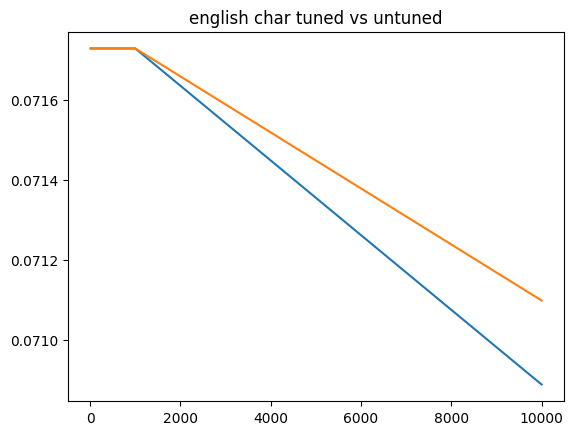

In [36]:
import matplotlib.pyplot as plt

x_axis_english_char=[10,100,1000,10000]
y_axis_english_char=[]

x_axis_english_tuned=[10,100,1000,10000]
y_axis_english_char_tuned=[]


for key in english_char:
    y_axis_english_char.append(english_char[key])
    
for key in english_char_tuned:
    y_axis_english_char_tuned.append(english_char_tuned[key])

plt.plot(x_axis_english_char, y_axis_english_char)

plt.plot(x_axis_english_tuned,y_axis_english_char_tuned)

plt.title('english char tuned vs untuned')
plt.show()




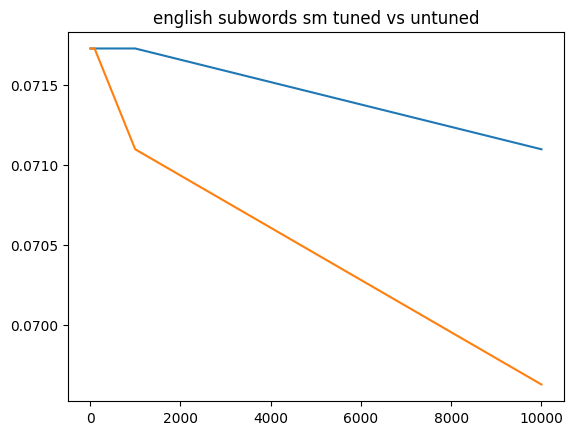

In [37]:
import matplotlib.pyplot as plt

x_axis_english_subwords_sm=[10,100,1000,10000]
y_axis_english_subwords_sm=[]

x_axis_english_tuned_subwords_sm=[10,100,1000,10000]
y_axis_english_tuned_subwords_sm=[]


for key in english_subwords_sm:
    y_axis_english_subwords_sm.append(english_subwords_sm[key])
    
for key in english_subwords_sm_tuned:
    y_axis_english_tuned_subwords_sm.append(english_subwords_sm_tuned[key])

plt.plot(x_axis_english_subwords_sm, y_axis_english_subwords_sm)

plt.plot(x_axis_english_tuned_subwords_sm,y_axis_english_tuned_subwords_sm)

plt.title('english subwords sm tuned vs untuned')

plt.show()


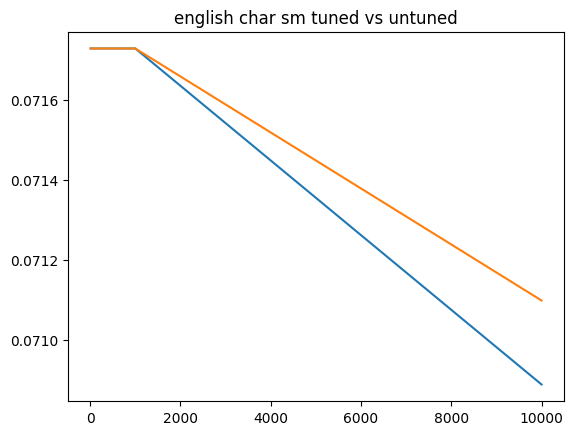

In [38]:
import matplotlib.pyplot as plt

x_axis_english_char=[10,100,1000,10000]
y_axis_english_char=[]

x_axis_english_tuned=[10,100,1000,10000]
y_axis_english_char_tuned=[]


for key in english_char:
    y_axis_english_char.append(english_char[key])
    
for key in english_char_tuned:
    y_axis_english_char_tuned.append(english_char_tuned[key])

plt.plot(x_axis_english_char, y_axis_english_char)

plt.plot(x_axis_english_tuned,y_axis_english_char_tuned)

plt.title('english char sm tuned vs untuned')

plt.show()



## **6. Analysis** (20 points)

Write a succinct summary of your observations for all the tasks, what you aimed to achieve, and whether your expectations were fulfilled. What are your takeaways from this project? How do your results differ for English and Bengali? What hyperparameters do you use to optimise the OOV rates? Are there any ways you could improve your results?

For this section, we will also consider the overall style and how well-written the report is. You should write the summary in the same final Notebook you submit. It should be roughly 500-800 words.

# 4) Grading

The project comprises 25% of the final grade. The grading for this project is distributed as follows:

- Data preparation (12 points)
- Subword units (16 points)
- LM training (20 points)
- Text generation (16 points)
- OOV comparison (16 points)
- Analysis (20 points)